In [1]:
import torch
import torchvision.transforms as transforms
import cv2
import matplotlib.pyplot as plt

from network.Transformer import Transformer

# Load Model
- Hayao_net_G_float.pth
- Hosoda_net_G_float.pth
- Paprika_net_G_float.pth
- Shinkai_net_G_float.pth

In [18]:
model = Transformer()
model.load_state_dict(torch.load('pretrained_model/Shinkai_net_G_float.pth'))
model.eval()
print('Model loaded!')

Model loaded!


# Preprocessing

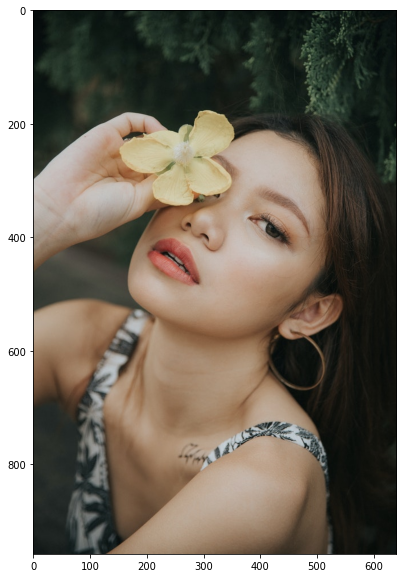

In [19]:
img_size = 450
img_path = 'test_img/01.jpg'

img = cv2.imread(img_path)

T = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(img_size, 2),
    transforms.ToTensor()
])

img_input = T(img).unsqueeze(0)

img_input = -1 + 2 * img_input # 0 - 1 -> -1 - +1

plt.figure(figsize=(16, 10))
plt.imshow(img[:, :, ::-1])

# Inference

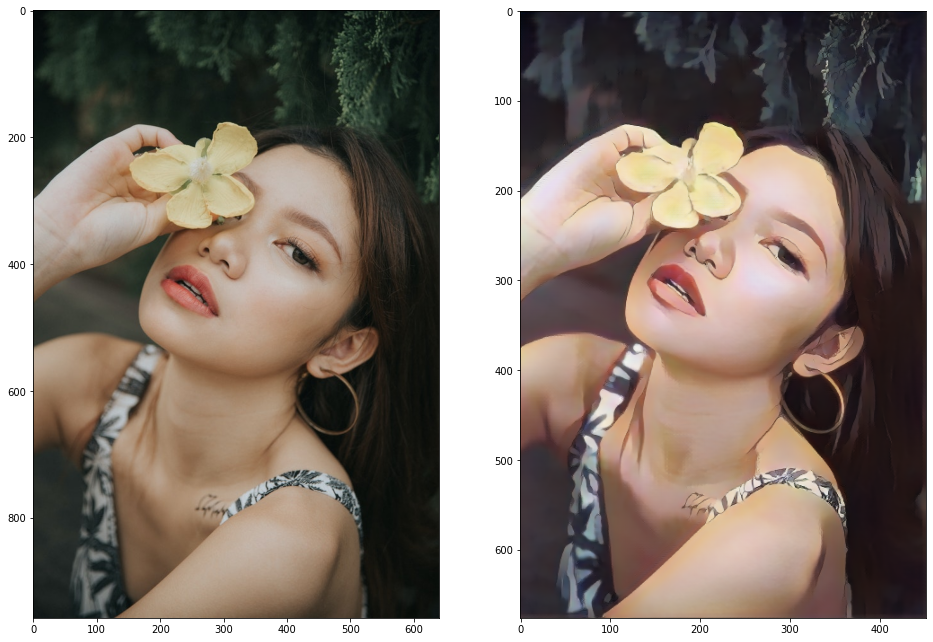

In [20]:
img_output = model(img_input)

img_output = (img_output.squeeze().detach().numpy() + 1.) / 2.
img_output = img_output.transpose([1, 2, 0])

fig, axes = plt.subplots(1, 2, figsize=(16, 16))
axes[0].imshow(img[:, :, ::-1])
axes[1].imshow(img_output[:, :, ::-1])